Importing libraries


In [ ]:
import numpy as np # Linear algebra
import pandas as pd # data processing
pd.set_option('display.max_columns', None)
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [ ]:
data=pd.read_csv('startup data.csv')

In [ ]:
data.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,1/1/2007,NaN,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,CA,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,1/1/2000,NaN,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,CA,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,3/18/2009,NaN,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,CA,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,1/1/2002,NaN,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,CA,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,CA,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,closed


Univariate & Multivariate Analysis

In [ ]:
data['State'] = 'other'
data.loc[(data['state_code'] == 'CA'), 'State'] = 'CA'
data.loc[(data['state_code'] == 'NY'), 'State'] = 'NY'
data.loc[(data['state_code'] == 'MA'), 'State'] = 'MA'
data.loc[(data['state_code'] == 'TX'), 'State'] = 'TX'
data.loc[(data['state_code'] == 'WA'), 'State'] = 'WA'

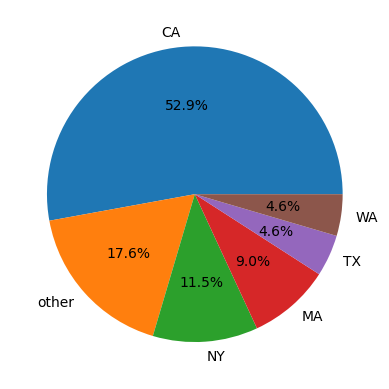

In [ ]:
state_count = data['State'].value_counts()
plt.pie(state_count, labels = state_count.index, autopct = '%1.1f%%')
plt.show()

In [ ]:
data['category'] = 'other'
data.loc[(data['category_code'] == 'software'), 'category'] = 'software'
data.loc[(data['category_code'] == 'web'), 'category'] = 'web'
data.loc[(data['category_code'] == 'mobile'), 'category'] = 'mobile'
data.loc[(data['category_code'] == 'enterprise'), 'category'] = 'enterprise'
data.loc[(data['category_code'] == 'advertising'), 'category'] = 'advertising'
data.loc[(data['category_code'] == 'games_video'), 'category'] = 'games_video'
data.loc[(data['category_code'] == 'semiconductor'), 'category'] = 'semiconductor'
data.loc[(data['category_code'] == 'network_hosting'), 'category'] = 'network_hosting'
data.loc[(data['category_code'] == 'biotech'), 'category'] = 'biotech'
data.loc[(data['category_code'] == 'hardware'), 'category'] = 'hardware'

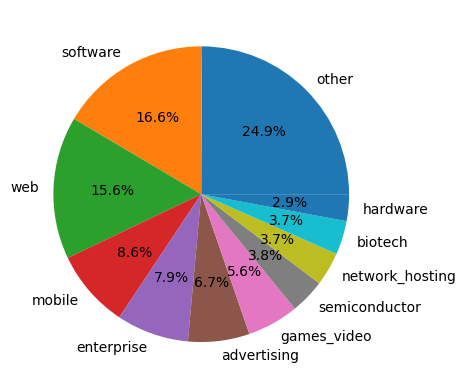

In [ ]:
category_count = data['category'].value_counts()
plt.pie(category_count, labels = category_count.index, autopct = '%1.1f%%')
plt.show()

Distribution of Status of Startup

In [ ]:
prop_df = data.groupby('status').size().reset_index(name = 'counts')
prop_df['proportions'] = prop_df['counts']/prop_df['counts'].sum()


Text(0.5, 1.0, 'Distribution of Status of the Startup')

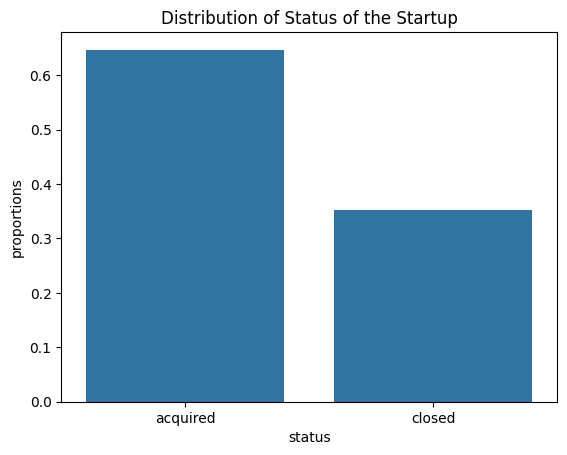

In [ ]:
sns.barplot(data = prop_df, x = 'status', y = 'proportions')
plt.title('Distribution of Status of the Startup')

State Vs. Staus

Text(0.5, 1.0, 'State vs. Status')

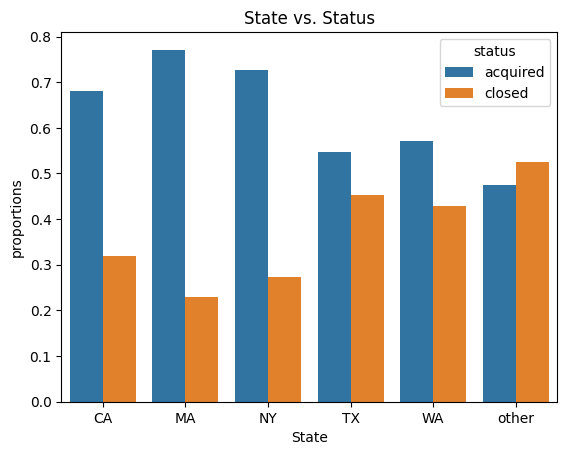

In [ ]:
prop_df= data.groupby(['State', 'status'], group_keys = True).size().reset_index(name='count')
prop_df ['proportions'] = prop_df.groupby('State') ['count'].transform(lambda x: x/x.sum())
sns.barplot(data =prop_df, x =  'State', y = 'proportions', hue = 'status')
plt.title('State vs. Status')

State Vs. Category

<Axes: xlabel='category', ylabel='proportions'>

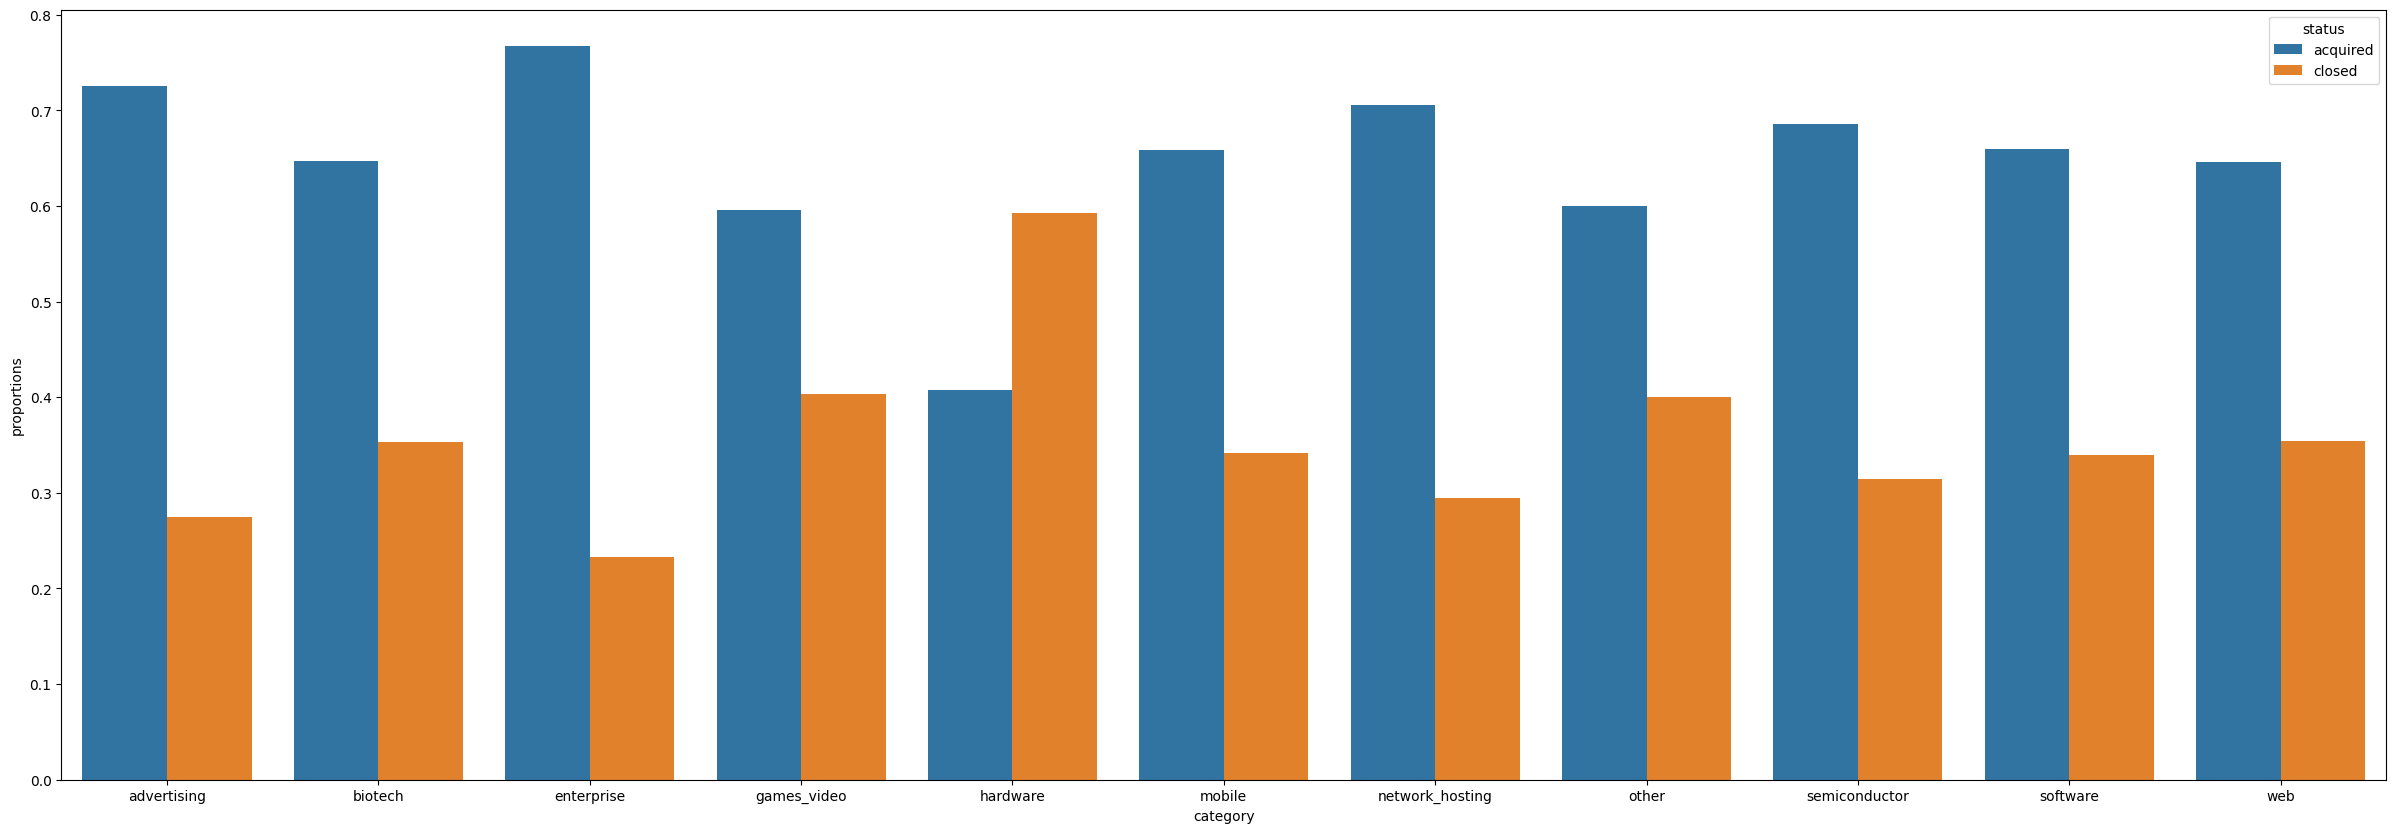

In [ ]:
fig, ax = plt.subplots(figsize = (30,10))
prop_df = data.groupby(['category', 'status']).size().reset_index(name='counts')
prop_df['proportions'] = prop_df.groupby('category') ['counts'].transform(lambda x: x/float(x.sum()))
sns.barplot ( data = prop_df, x = 'category', y = 'proportions', hue = 'status')

Category Vs. Founded- Year

In [ ]:
cat_year=pd.crosstab(index=data['founded_at'],columns=data['category'])

Text(0.5, 1.0, 'Category wise evolution of startups')

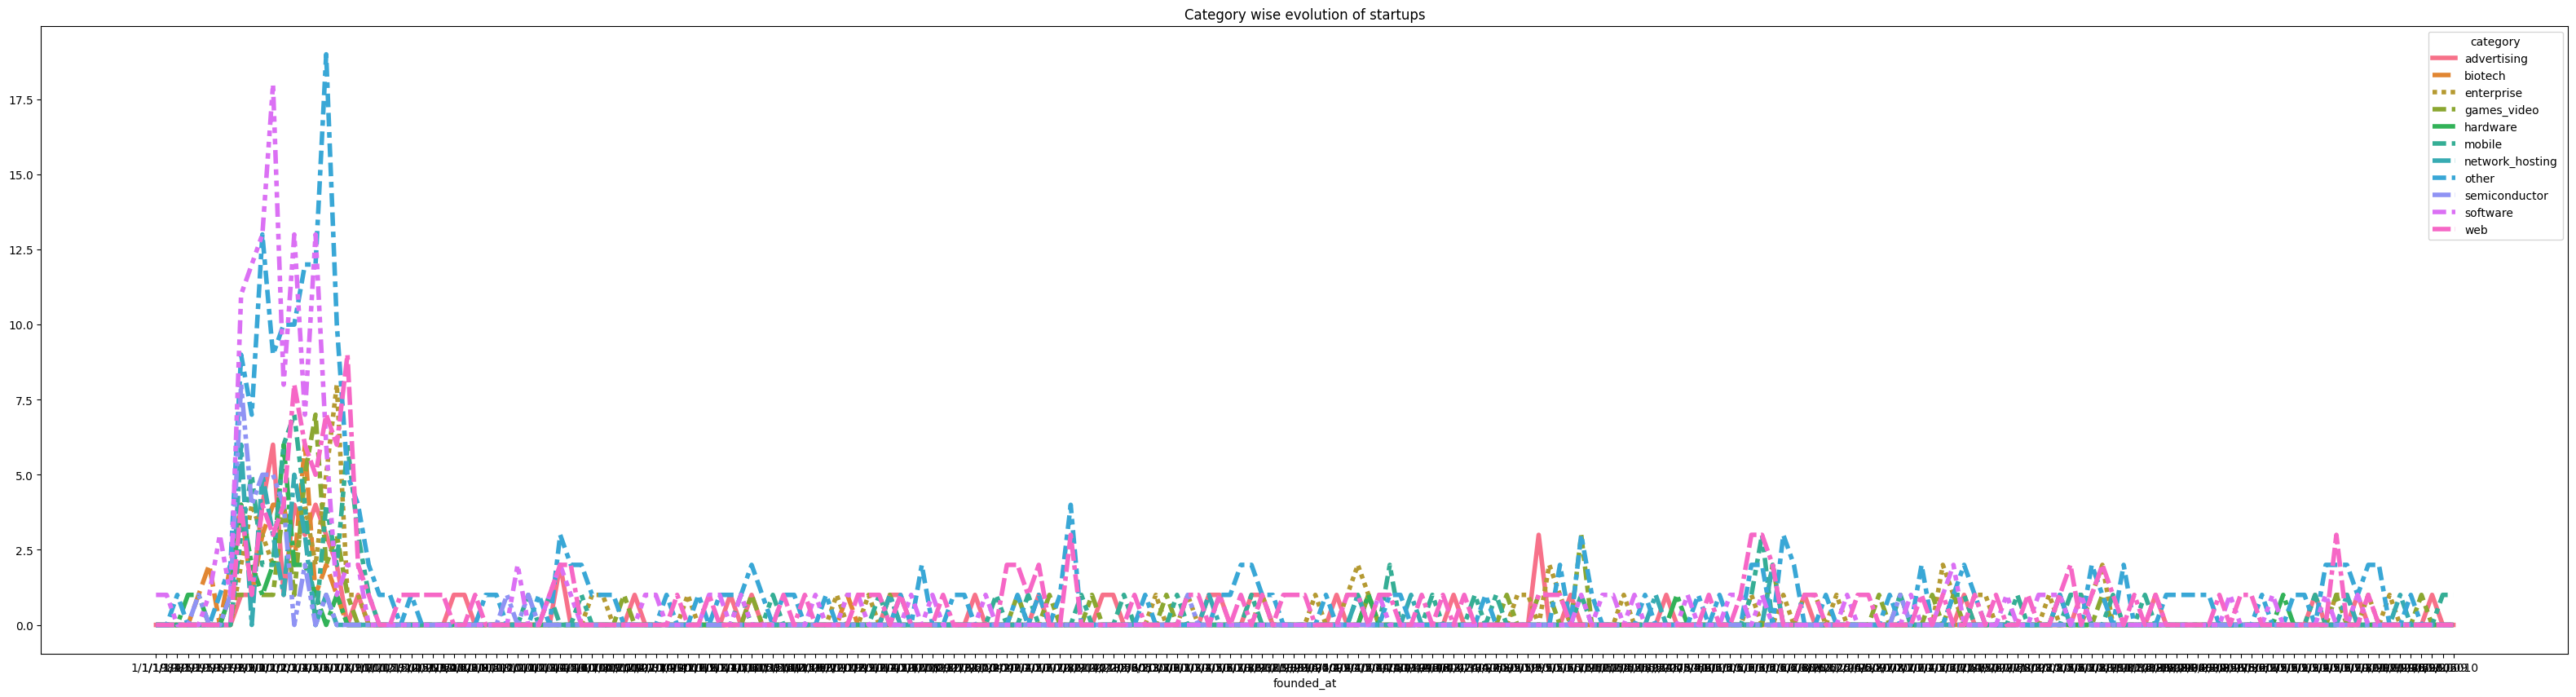

In [ ]:
fig,ax=plt.subplots(figsize=(40,10))
sns.lineplot(data=cat_year,lw=4)
plt.title('Category wise evolution of startups')

Founded- Year Vs. Total Funding

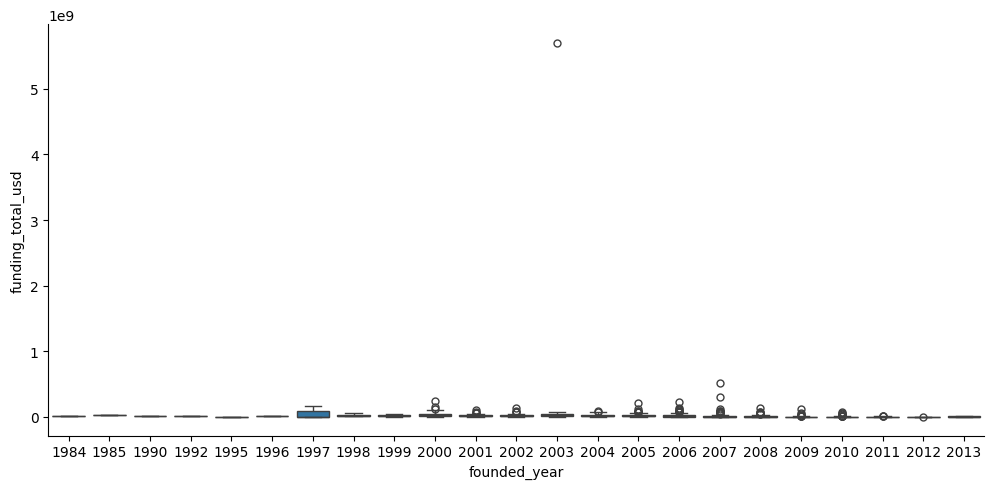

In [ ]:
data['founded_year'] = pd.to_datetime(data['founded_at'], errors='coerce').dt.year
year_order = sorted(data['founded_year'].dropna().unique().astype(int))
sns.catplot(data=data, x='founded_year', y='funding_total_usd', kind='box', height=5, aspect=2, order=year_order)

Has_VC, Has_angel, Has_roundA, Has_roundB, Has_roundC, Has_roundD

<Axes: >

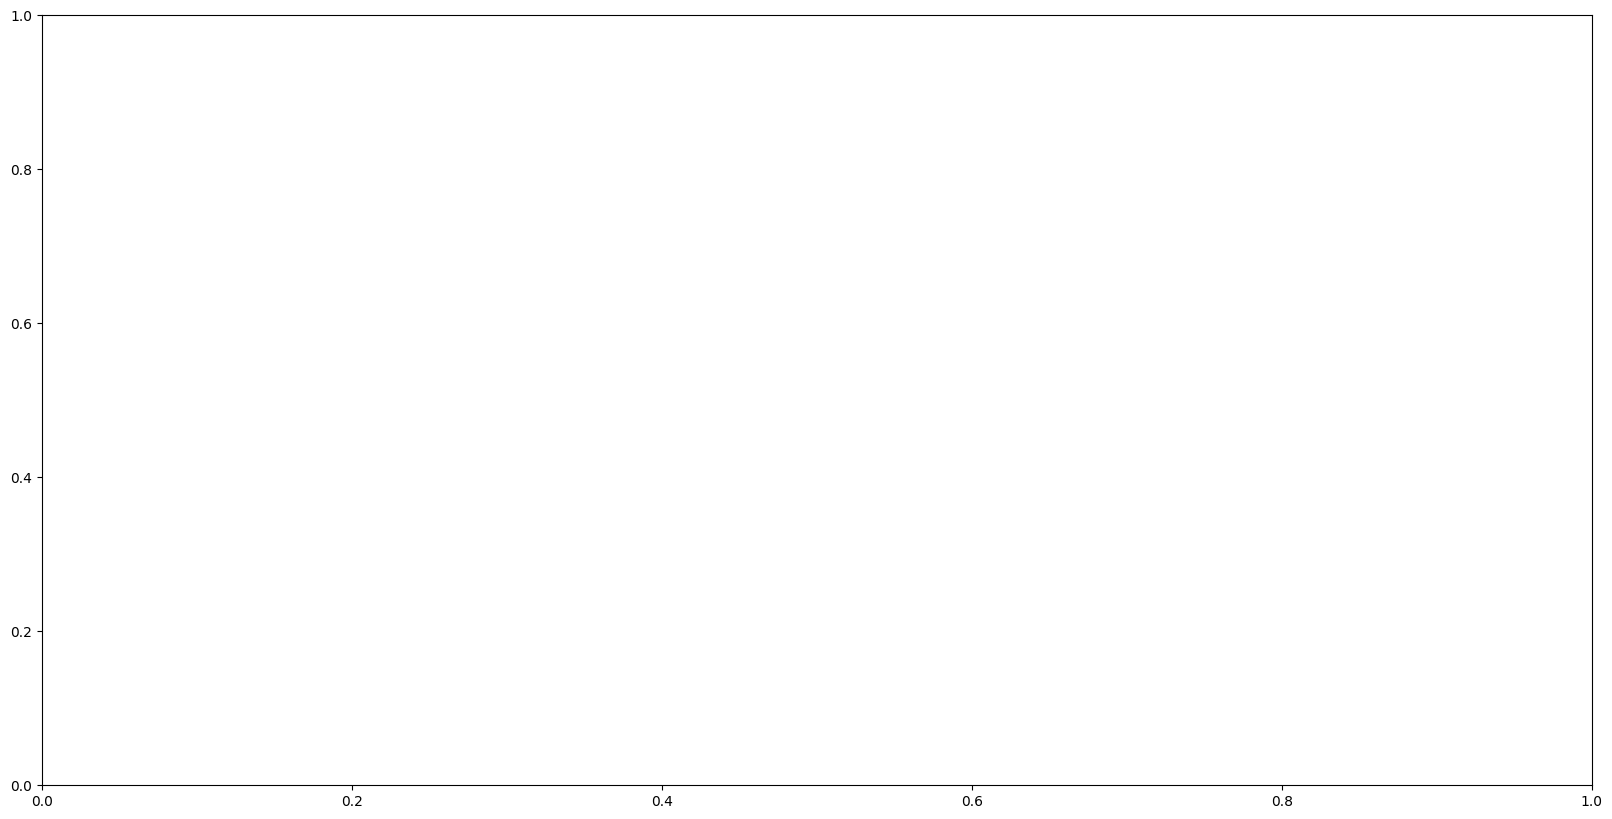

In [ ]:
fig,ax=plt.subplots(figsize=(20,10))
d=data.loc[data['status']=='1']
f=d[["has_VC","has_angel","has_roundA","has_roundB","has_roundC","has_roundD"]]
sns.countplot(data=pd.melt(f),x='variable',hue='value')

Statistical Analysis

In [ ]:
data.describe(include=['float64','int64'])

,Unnamed: 0,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
count,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,771.000000,771.000000,923.000000,923.000000,9.230000e+02,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.00000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000
mean,572.297941,38.517442,-103.539212,0.646804,2.235630,3.931456,3.055353,4.754423,7.710726,2.310943,2.541975e+07,1.841820,0.527627,0.114843,0.089924,0.045504,0.221018,0.165764,0.156013,0.08559,0.079090,0.067172,0.056338,0.027086,0.036836,0.003250,0.322860,0.326111,0.254605,0.508126,0.392199,0.232936,0.099675,2.838586,0.809317
std,333.585431,3.741497,22.394167,0.478222,2.510449,2.967910,2.977057,3.212107,7.265776,1.390922,1.896344e+08,1.322632,0.499507,0.319005,0.286228,0.208519,0.415158,0.372070,0.363064,0.27991,0.270025,0.250456,0.230698,0.162421,0.188462,0.056949,0.467823,0.469042,0.435875,0.500205,0.488505,0.422931,0.299729,1.874601,0.393052
min,1.000000,25.752358,-122.756956,0.000000,-9.046600,-9.046600,-14.169900,-7.005500,0.000000,1.000000,1.100000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,283.500000,37.388869,-122.198732,0.000000,0.576700,1.669850,1.000000,2.411000,3.000000,1.000000,2.725000e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.000000
50%,577.000000,37.779281,-118.374037,1.000000,1.446600,3.528800,2.520500,4.476700,5.000000,2.000000,1.000000e+07,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.500000,1.000000
75%,866.500000,40.730646,-77.214731,1.000000,3.575350,5.560250,4.686300,6.753400,10.000000,3.000000,2.472500e+07,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.800000,1.000000
max,1153.000000,59.335232,18.057121,1.000000,21.895900,21.895900,24.684900,24.684900,63.000000,10.000000,5.700000e+09,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,1.000000


Correlation Plot

<Axes: >

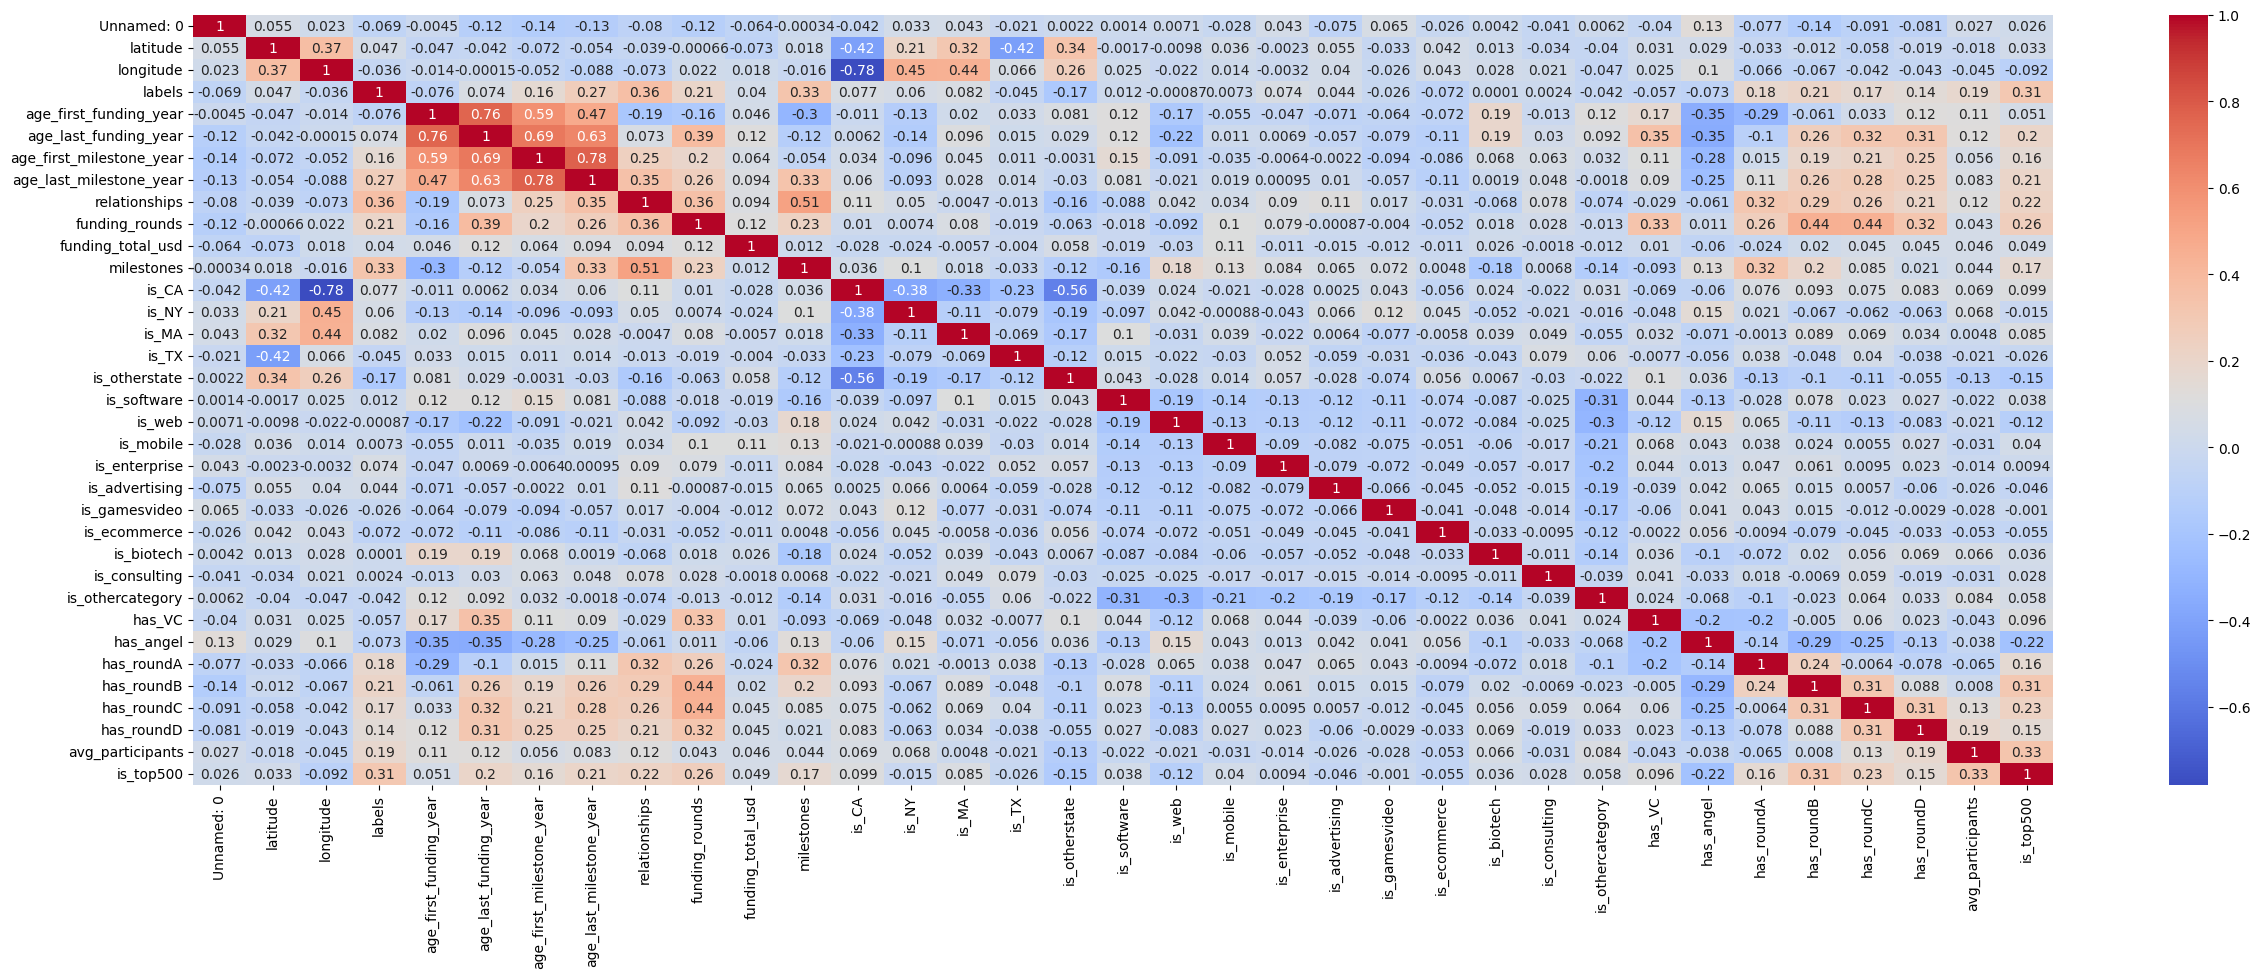

In [ ]:
fig, ax = plt.subplots(figsize = (30,10))
corr = data.select_dtypes (include=['int64', 'float64']).corr()
sns.heatmap(corr, cmap = 'coolwarm', annot = True)

Pre- Processing


Reducing the Number of Categories

In [ ]:
print(data['state_code'].equals(data['state_code.1']))

False


In [ ]:
df =data.loc[data['state_code'] != data['state_code.1']]
df.style.set_properties(**{'background-color': 'yellow'}, subset=['state_code', 'state_code.1'])

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,State,category,founded_year
515,1110,CA,37.451124,-122.166264,94025,c:856,Menlo Park,nan,Cuil,0,1/1/2005,9/1/2010,3/1/2007,4/15/2008,2.161600,3.287700,3.498600,7.690400,13,2,33000000,4,nan,0,0,0,0,0,c:856,0,0,1,1,0,0,2.500000,1,closed,CA,other,2005


In [ ]:
state = data['state_code'].value_counts().to_frame()
state['proportion'] = state['count']/sum(state['count'])*100
state

,count,proportion
state_code,,
CA,488,52.871073
NY,106,11.484290
MA,83,8.992416
WA,42,4.550379
TX,42,4.550379
CO,19,2.058505
IL,18,1.950163
PA,17,1.841820
VA,13,1.408451


Dropping the Irrelevant Columns

In [ ]:
data = data.drop([
    'category_code',
    'is_software',
    'is_web',
    'is_mobile',
    'is_enterprise',
    'is_advertising',
    'is_gamesvideo',
    'is_ecommerce',
    'is_biotech',
    'is_consulting',
    'is_othercategory'
], axis=1, errors='ignore')

In [ ]:
# Define target variable y
y = data['labels']

# Define feature matrix x
# Select all numerical columns and drop the target 'labels' and irrelevant identifier columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
# Remove 'labels' from numerical columns to form features
feature_cols = [col for col in numerical_cols if col != 'labels' and col not in ['Unnamed: 0', 'object_id']]
x = data[feature_cols]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=116)

In [ ]:
rf = RandomForestClassifier()
param_grid = {'n_estimators': [100, 200, 300],
'max_depth': [10,20,30],
'min_samples_split': [2,4,6],
'min_samples_leaf': [1,2,3],
'bootstrap': [True, False]}
grid_search = GridSearchCV(estimator=rf, param_grid = param_grid, cv = 5, n_jobs = 1,verbose=False)
grid_search.fit(X_train, y_train)
print('Best parameters:', grid_search.best_params_)

Best parameters: {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 200}


In [ ]:
rf = RandomForestClassifier(n_estimators=100, bootstrap=False, max_depth=20, min_samples_leaf=2, min_samples_split=2)
model_rf = rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
cr_rf = classification_report(y_pred_rf, y_test)
print(cr_rf)

              precision    recall  f1-score   support

           0       0.49      0.81      0.61        54
           1       0.95      0.79      0.86       223

    accuracy                           0.80       277
   macro avg       0.72      0.80      0.74       277
weighted avg       0.86      0.80      0.81       277



In [ ]:
#applying Random forest classifier
model=RandomForestClassifier()
model.fit(X_train, y_train)
y_pred_test=model.predict(X_test)
y_pred_train=model.predict(X_train)

In [ ]:
#checking accuracy
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
test_acc = accuracy_score(y_test,y_pred_test)
train_acc = accuracy_score(y_train,y_pred_train)
print('test_acc: ', test_acc)
print('train_acc:', train_acc)

test_acc:  0.8014440433212996
train_acc: 1.0


Save and load the best model

In [ ]:
import joblib
joblib.dump(model, 'random_forest_model.pkl')

['random_forest_model.pkl']